# Classification of Real cats and Cat plush toys

In [0]:
# Some extra meaures
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### Importing libraries

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

### Gathering Data
All the images used for training and testing are gathered from Google Images.

In [0]:
# Create folder for each category (realcat and plushy)
folder = 'plushy'
file = 'urls_plushy.csv'

In [0]:
# folder = 'realcat'
# file = 'urls_realcat.csv'

In [0]:
# Setting path for downloading images. Run this cell for each category.
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('data/bears/urls_realcat.csv'),
 PosixPath('data/bears/realcat'),
 PosixPath('data/bears/plushy'),
 PosixPath('data/bears/urls_plushy.csv')]

In [0]:
classes = ['realcat', 'plushy']

In [0]:
# Download images
download_images(path/file, dest, max_pics=200)

In [0]:
# Check whether the image is OK for use otherwise DELETE it.
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

### Preparing data for training 

*   **DataBunch** objects contains all the data including Training and Validation data.
*   **from_folder** method is used for getting data from the locally stored image files. The data we have is stored in individual folders with the name of the folder as the label for each category.


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['plushy', 'realcat']

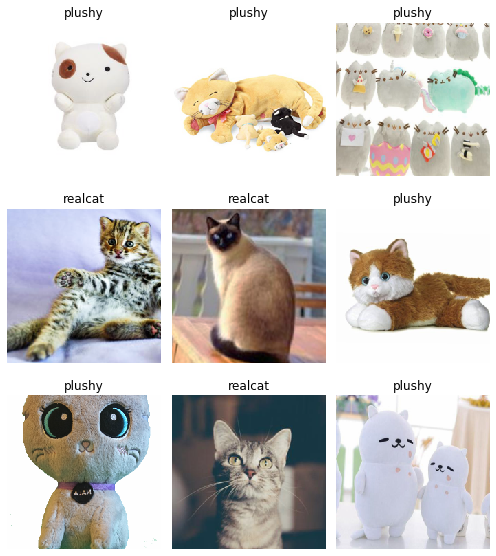

In [0]:
# show a sample of the data
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['plushy', 'realcat'], 2, 300, 74)

### Creating a model.

We use RESNET34 trained on the ImageNet data as the base of our model. Then transfer its weight to our data using Transfer Learning.



In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 71.8MB/s]


To understand 1cycle policy you can checkout the following links -

*   [Graphical and intuitive explanation](https://sgugger.github.io/the-1cycle-policy.html)
*   [Original paper proposed by *Leslie N. Smith*](https://arxiv.org/abs/1803.09820)



In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.911231,0.111002,0.054054,00:05
1,0.553838,0.041635,0.013514,00:05
2,0.411436,0.023147,0.013514,00:05
3,0.317313,0.026310,0.027027,00:05


In [0]:
# Save current model for future use
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

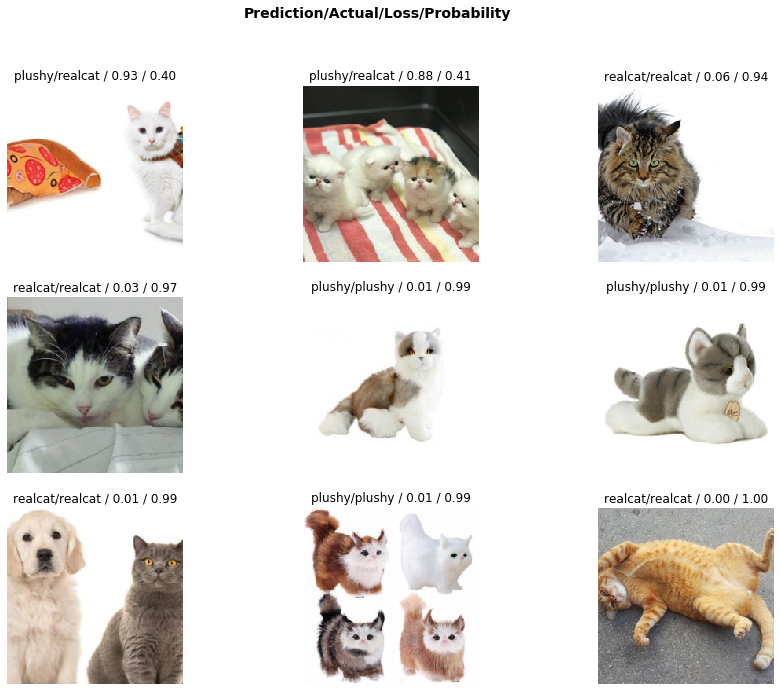

In [0]:
# Show the images that had the largest Loss when predicting their category.
interp.plot_top_losses(9, figsize=(15,11))

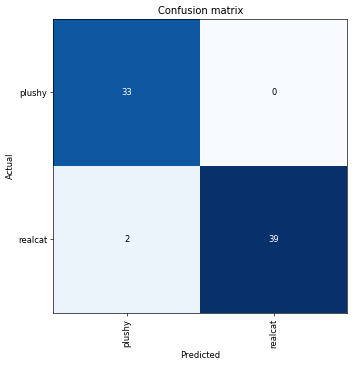

In [0]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [0]:
# Use unfreeze to train entire model.
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.088610,0.092800,0.027027,00:05


In [0]:
learn.load('stage-1');

In [0]:
# find best learning rate
learn.lr_find(start_lr=1e-5, end_lr=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


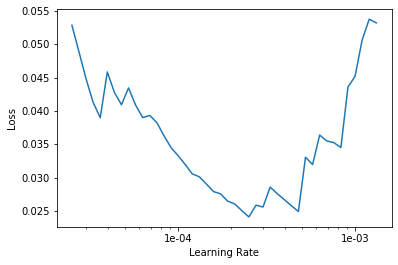

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.009110,0.020500,0.013514,00:05
1,0.017034,0.021026,0.013514,00:05


In [0]:
interp2 = ClassificationInterpretation.from_learner(learn)

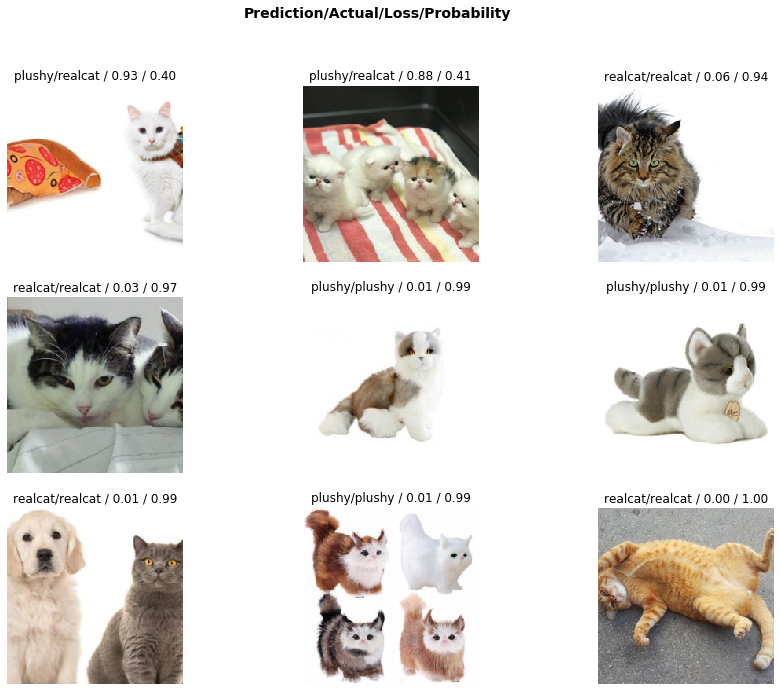

In [0]:
interp.plot_top_losses(9, figsize=(15,11))